## Task: Train an EMNIST classifier

EMNIST (or extended MNIST) is just like MNIST, a bunch of handwritten images, except instead of just digits (0-9) it also has uppercase and lowercase characters.

You are provided with the code to load the EMNIST train and split **datasets**

Write and train a classifier for EMNIST. Make sure to

- Show how your loss(es) dropped during training.
- Use the testset as a validation set duirng training.
- Show final performance of your model on untrained data.
- Maintain good code quality.


In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install torch torchvision
%pip install matplotlib

clear_output()

In [ ]:
import torch
import torch.nn as nn

from torchvision.datasets import EMNIST
import torchvision.transforms.functional as F

In [ ]:
train_data = EMNIST(root='emnist_data/', split='byclass', download=True)
test_data = EMNIST(root='emnist_data/', split='byclass', download=True, train=False)

100%|██████████| 561753746/561753746 [00:22<00:00, 25327686.20it/s]


Extracting emnist_data/EMNIST/raw/gzip.zip to emnist_data/EMNIST/raw


Number of classes in dataset: 62
Unique labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
7


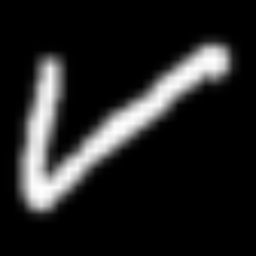

In [ ]:
# This cell is for demo purposes. feel free to remove it if you want.
print('Number of classes in dataset:', len(train_data.classes))
print('Unique labels:', train_data.classes)

demo_img, demo_label = train_data[10]

print(demo_label)
F.resize(demo_img, (256, 256)) #resizing just for display

In [ ]:
import matplotlib.pyplot as plt

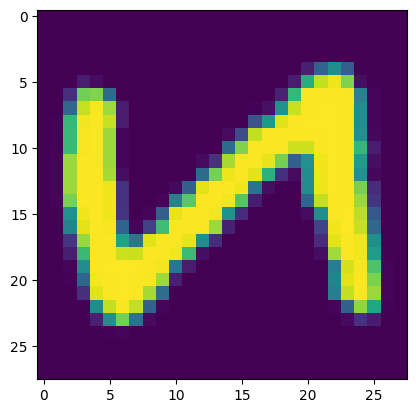

In [ ]:
plt.imshow(train_data[0][0])

In [ ]:
len(train_data)

697932

In [ ]:
from torchvision import transforms
train_data.transform = transforms.ToTensor()
test_data.transform = transforms.ToTensor()

In [ ]:
import numpy as np

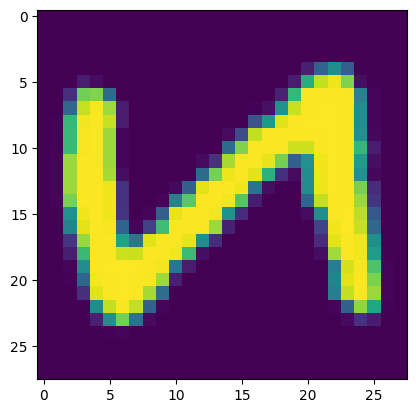

In [ ]:
plt.imshow(np.transpose(train_data[0][0],(1,2,0)))

In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data,batch_size=100)
test_loader = DataLoader(test_data,batch_size=100)

In [ ]:
model = nn.Sequential(
    nn.Linear(1*28*28,100),
    nn.Sigmoid(),
    nn.Linear(100,62)
)

In [ ]:
import torch
from torch import nn, optim, utils

In [ ]:
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
epochs = 10

for epoch in range(epochs):
  total_loss = 0

  for features, labels in train_loader:
    optimizer.zero_grad()
    # forward
    predictions = model(features.reshape(-1,1*28*28))

    # loss
    loss = loss_fn(predictions,labels)

    total_loss += loss.item() # item to extract from tensor the value

    #backward

    loss.backward()

    optimizer.step()

  print(f'Epoch { epoch +1} , loss {total_loss/len(train_loader)}')

Epoch 1 , loss 1.4800073336735153
Epoch 2 , loss 0.9376104111700482


In [ ]:

correct = 0
total = 0
with torch.no_grad():
  for batch in test_loader:
    X,y = batch[0], batch[1]
    yhat = model(X.reshape(-1,1*28*28))
    labels = torch.argmax(yhat, dim = 1)
    correct +=  torch.sum(labels==y)
    total += len(batch[1])


print(f"accuracy is {correct/total}")



In [ ]:
type(train_data[0][0])

torch.Tensor